# Autoencoder with MNIST

## Load the Data

In [3]:
from tensorflow.keras.datasets import mnist

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train = X_train_full[:50000]
y_train = y_train_full[:50000]

In [5]:
X_train = X_train / 255.

In [6]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

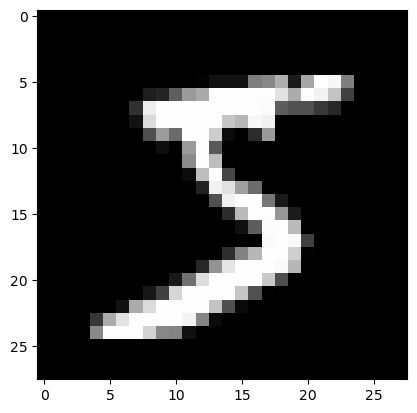

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='grey')

## Build the Autoencoder

In [12]:
encoder = Sequential([Flatten(input_shape=[28, 28]), Dense(100, activation='relu'), Dense(30, activation='relu')])
decoder = Sequential([Dense(100, activation='relu'), Dense(28 * 28, activation='relu'), Reshape([28, 28])])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
ae = Sequential([encoder, decoder])
ae.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 30)                  │          81,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 28, 28)              │          82,284 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,814 (639.90 KB)

 Trainable params: 163,814 (639.90 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
ae.compile(optimizer='adam', loss='mse')

In [22]:
ae.fit(X_train, X_train, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0195
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0176
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0169
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0163
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0154
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0149
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0148
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0146
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0144
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0143
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0142
Epoch 12/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0141
Epoch 13/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0137
Epoch 14/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0137
Epoch 15/50
1563/1563 ━━━━━━━

## Testing

In [24]:
pred = ae.predict(X_train[0].reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


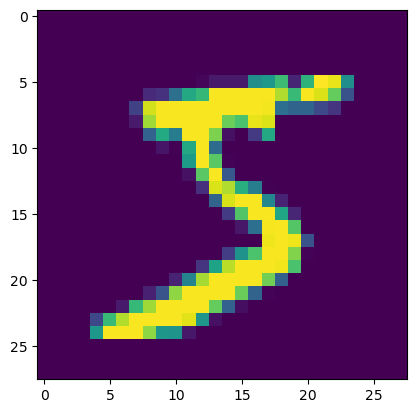

In [26]:
plt.imshow(X_train[0])

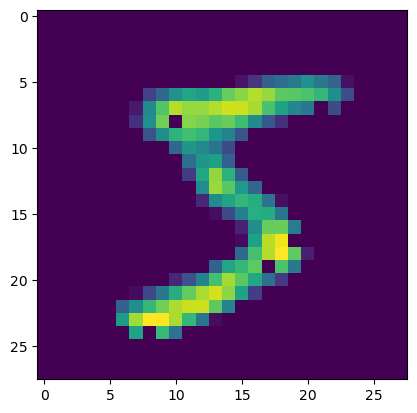

In [28]:
plt.imshow(pred[0])

In [30]:
ae.layers[0].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           3,030 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,530 (318.48 KB)

 Trainable params: 81,530 (318.48 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
ae.layers[1].summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │          79,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,284 (321.42 KB)

 Trainable params: 82,284 (321.42 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
embedding_model = Model(inputs=[ae.layers[0].inputs], outputs=[ae.layers[0].layers[-1].output])

In [36]:
embedding_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           3,030 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,530 (318.48 KB)

 Trainable params: 81,530 (318.48 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
embedded_data = embedding_model.predict(X_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step


## Visualizing the Lantent space

In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

### Principal Components Analysis

In [43]:
pca_reduced = pca.fit_transform(embedded_data)

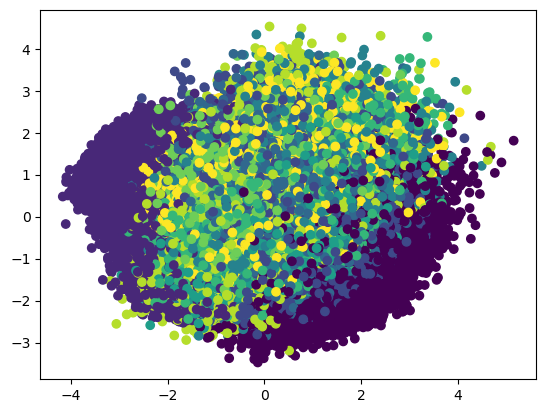

In [45]:
plt.scatter(pca_reduced[:, 0], pca_reduced[:, 1], c=y_train)

### t-SNE

In [49]:
tsne_reduced = tsne.fit_transform(embedded_data[:2000])

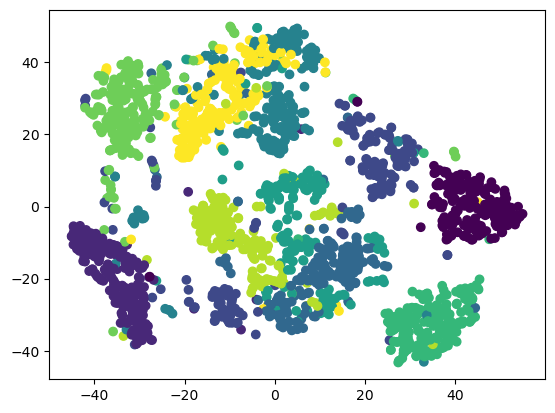

In [51]:
plt.scatter(tsne_reduced[:, 0], tsne_reduced[:, 1], c=y_train[:2000])

# Autoencoder with Fashion MNIST

In [54]:
from tensorflow.keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train_full[:50000]
y_train = y_train_full[:50000]

In [56]:
X_train = X_train / 255.

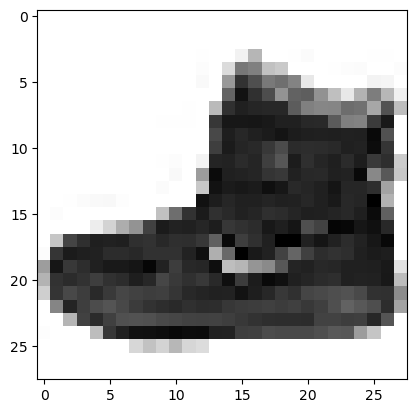

In [90]:
plt.imshow(X_train[0], cmap='binary')

In [60]:
encoder = Sequential([Flatten(input_shape=[28, 28]), Dense(100, activation='relu'), Dense(30, activation='relu')])
decoder = Sequential([Dense(100, activation='relu'), Dense(28 * 28, activation='relu'), Reshape([28, 28])])

ae = Sequential([encoder, decoder])
ae.compile(optimizer='adam', loss='mse')

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
ae.fit(X_train, X_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0224
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0218
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0215
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0212
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0211
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0209
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0210
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0208
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0207
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0203
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0203
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0201
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0201
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0201
Epoch 15/20
1563/1563 ━━━━━━━

In [86]:
pred = ae.predict(X_train[9].reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


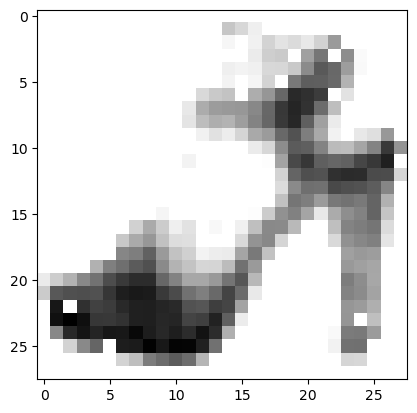

In [88]:
plt.imshow(pred[0], cmap='binary')